# Lab 02

This work will cover the usage of convolution and correlation in signal processing and in statistics.

## 1. Convolution and correlation

From the point of view of signal processing convolution and correlation are very similar operations. They are defined as following

Convolution:
$$ (f*g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y-x)dx$$
Cross-correlation:
$$ (f\star g)(y) = \int\limits_{-\infty}^{\infty} f(x)g(y+x)dx$$

If `g(x)` is symmetric then the convolution and cross-correlation are the same.

Let's create a numpy array with square-shaped signal.

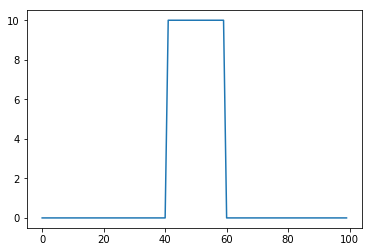

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
N = 100 # sample count
startX = 40  
endX = 60
x = np.arange(N)
x = ((x < endX) * (x> startX))*10
plt.plot(x);

Let's create a triangular signal.

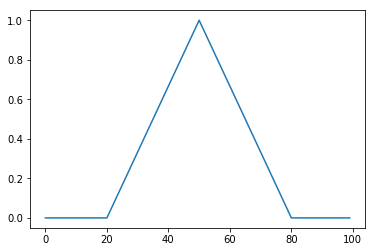

In [3]:
y = np.zeros(100)
heightY = 1.0
startY = 20
endY=80
widthY = (endY-startY)/2.0
for i in range(startY,N/2):
 y[i] =  (i-startY) * (heightY / widthY) 
for i in range(N/2,endY):
 y[i] = 2*heightY - ((i-startY) * (heightY / widthY))
plt.plot(y);

Now let's apply two operations on the inputs and compare results.

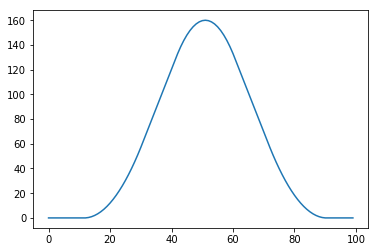

In [4]:
from scipy.signal import convolve
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

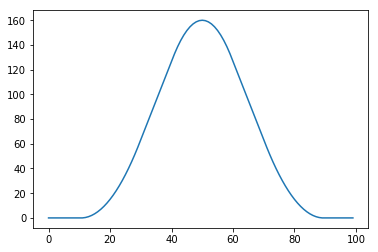

In [5]:
from scipy.signal import correlate
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

As you see, the result of convolution for symmetric kernel is the same as result of correlation.

### Exercise 1
Try these two operations with the non-symetric kernel.

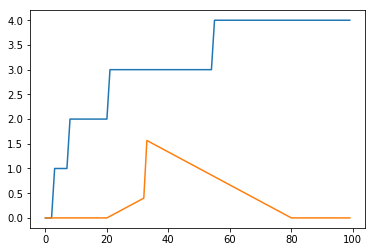

In [42]:
# your code here
# function x
N = 100  # sample count
startX = 30  
endX = 60
x = np.arange(N)
for i in range(1, N):
    x[i] = np.log(i)
plt.plot(x);

# function y
y = np.zeros(100)
heightY = 1.0
startY = 20
endY = 80
widthY = (endY-startY)/2.0
for i in range(startY, N/3):
    y[i] = (i-startY) * (heightY / widthY) 
for i in range(N/3, endY):
    y[i] = 2*heightY - ((i-startY) * (heightY / widthY))
plt.plot(y);

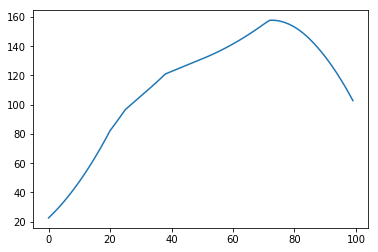

In [43]:
x_corr = correlate(x,y,'same')
plt.plot(x_corr);

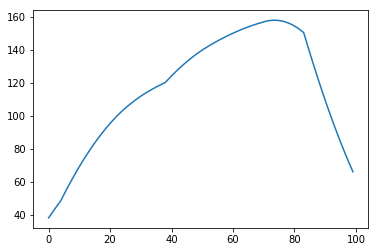

In [50]:
x_conv = convolve(x,y,'same')
plt.plot(x_conv);

## 2. Convolution of distributions
In statistics convolution plays important role.

The distribution of the *sum of two independent variables* is the convolution of the distributions.

I.e. if we consider two independent continuous random variables `X` and `Y` with PDFs `f` and `g` the PDF of their sum (X+Y) will be computed as: 

$$ d(x) = (f * g)(x) $$

We can get an interesting result if we consider the sum of several random variables with identical distributions, i.e. convolution of a distribution with itself several times.
2
For example, let's take a uniform distribution.

In [51]:
%%capture
orig = np.random.uniform(0,10,1200)
h = plt.hist(orig, bins=120, normed=True);
orig = h[0]
t = h[1]
xconv = np.copy(orig)

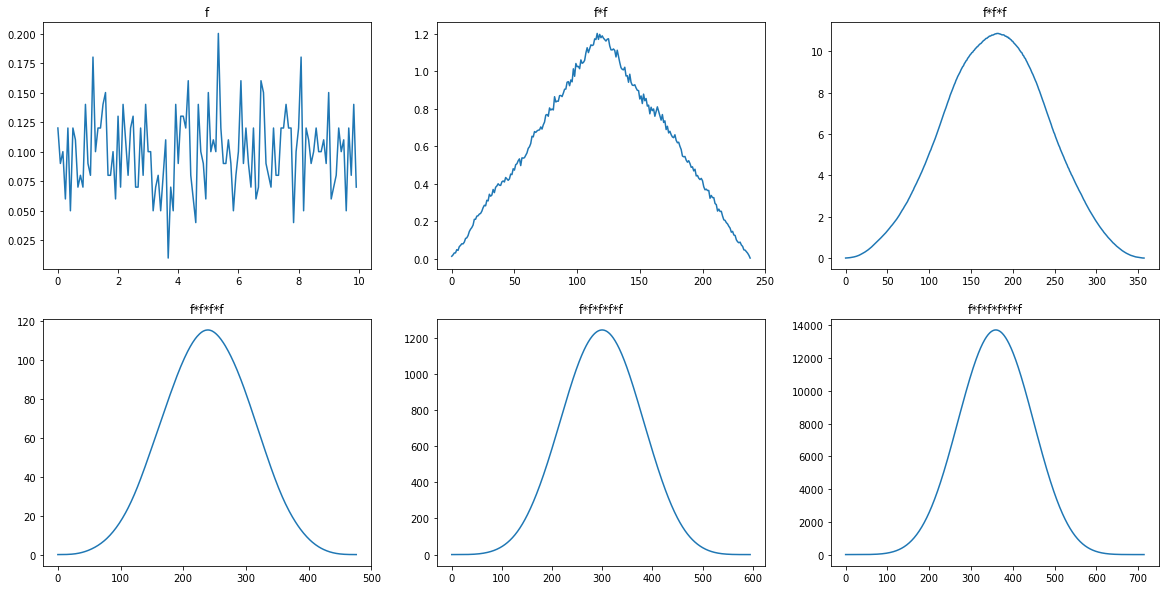

In [52]:
plt.figure(figsize=(20,10))
ax = plt.subplot(2, 3, 1)
ax.set_title("f")
ax.plot(t[:-1], orig);
for i in range(5):
    xconv = convolve(orig, xconv)
    ax = plt.subplot(2, 3, i+2)
    ax.set_title(("f*"*(i+2))[:-1])
    ax.plot(xconv);

This is an illustration of Central Limit Theorem: the distribution of the sum of random variables which are iid (independent identically distributed) has a form of a Gaussian.

## 3. Correlation and covariance

In statistics the linear correlation between two variables X and Y can be measured using Pearson correlation coefficient:

$$ corr(x,y) = \frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt {\sum\limits_{i=1}^n(x_i-\bar{x})^2\sum\limits_{i=1}^n(y_i-\bar{y})^2}}$$

In [58]:
import pandas as pd
import os.path
data = pd.read_csv(os.getcwd() + '/Lab02/examples/brain_size.csv', sep=';', na_values=".")
data.fillna(data.mean(), inplace=True)
data.corr()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unnamed: 0</th>
      <th>FSIQ</th>
      <th>VIQ</th>
      <th>PIQ</th>
      <th>Weight</th>
      <th>Height</th>
      <th>MRI_Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Unnamed: 0</th>
      <td>1.000000</td>
      <td>-0.334072</td>
      <td>-0.241473</td>
      <td>-0.371150</td>
      <td>0.168519</td>
      <td>0.123772</td>
      <td>-0.139724</td>
    </tr>
    <tr>
      <th>FSIQ</th>
      <td>-0.334072</td>
      <td>1.000000</td>
      <td>0.946639</td>
      <td>0.934125</td>
      <td>-0.049590</td>
      <td>-0.084175</td>
      <td>0.357641</td>
    </tr>
    <tr>
      <th>VIQ</th>
      <td>-0.241473</td>
      <td>0.946639</td>
      <td>1.000000</td>
      <td>0.778135</td>
      <td>-0.071988</td>
      <td>-0.069610</td>
      <td>0.337478</td>
    </tr>
    <tr>
      <th>PIQ</th>
      <td>-0.371150</td>
      <td>0.934125</td>
      <td>0.778135</td>
      <td>1.000000</td>
      <td>0.002461</td>
      <td>-0.075462</td>
      <td>0.386817</td>
    </tr>
    <tr>
      <th>Weight</th>
      <td>0.168519</td>
      <td>-0.049590</td>
      <td>-0.071988</td>
      <td>0.002461</td>
      <td>1.000000</td>
      <td>0.690199</td>
      <td>0.501977</td>
    </tr>
    <tr>
      <th>Height</th>
      <td>0.123772</td>
      <td>-0.084175</td>
      <td>-0.069610</td>
      <td>-0.075462</td>
      <td>0.690199</td>
      <td>1.000000</td>
      <td>0.601308</td>
    </tr>
    <tr>
      <th>MRI_Count</th>
      <td>-0.139724</td>
      <td>0.357641</td>
      <td>0.337478</td>
      <td>0.386817</td>
      <td>0.501977</td>
      <td>0.601308</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>
</div>

The unnormalized version of the correlation coefficient is the measure of joint variability - **covariance**.
$$ cov(x,y) = \frac{1}{n-1}\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) $$

In [60]:
data.cov()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Unnamed: 0</th>
      <th>FSIQ</th>
      <th>VIQ</th>
      <th>PIQ</th>
      <th>Weight</th>
      <th>Height</th>
      <th>MRI_Count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Unnamed: 0</th>
      <td>136.666667</td>
      <td>-94.051282</td>
      <td>-66.666667</td>
      <td>-97.500000</td>
      <td>45.052632</td>
      <td>5.705457</td>
      <td>-1.180682e+05</td>
    </tr>
    <tr>
      <th>FSIQ</th>
      <td>-94.051282</td>
      <td>579.946154</td>
      <td>538.376923</td>
      <td>505.501282</td>
      <td>-27.310391</td>
      <td>-7.993097</td>
      <td>6.225462e+05</td>
    </tr>
    <tr>
      <th>VIQ</th>
      <td>-66.666667</td>
      <td>538.376923</td>
      <td>557.720513</td>
      <td>412.939744</td>
      <td>-38.878543</td>
      <td>-6.482117</td>
      <td>5.760814e+05</td>
    </tr>
    <tr>
      <th>PIQ</th>
      <td>-97.500000</td>
      <td>505.501282</td>
      <td>412.939744</td>
      <td>504.948077</td>
      <td>1.264507</td>
      <td>-6.686325</td>
      <td>6.282894e+05</td>
    </tr>
    <tr>
      <th>Weight</th>
      <td>45.052632</td>
      <td>-27.310391</td>
      <td>-38.878543</td>
      <td>1.264507</td>
      <td>522.971660</td>
      <td>62.237382</td>
      <td>8.297610e+05</td>
    </tr>
    <tr>
      <th>Height</th>
      <td>5.705457</td>
      <td>-7.993097</td>
      <td>-6.482117</td>
      <td>-6.686325</td>
      <td>62.237382</td>
      <td>15.548060</td>
      <td>1.713821e+05</td>
    </tr>
    <tr>
      <th>MRI_Count</th>
      <td>-118068.230769</td>
      <td>622546.153846</td>
      <td>576081.435897</td>
      <td>628289.384615</td>
      <td>829761.016194</td>
      <td>171382.098817</td>
      <td>5.224695e+09</td>
    </tr>
  </tbody>
</table>
</div>

As you can see, the correlation and covariance always have the same sign which shows the tendency in the linear relationship between variables.

Let's now consider more closely the correlation between `Height` and `Weight` of the people from experiments.

In [61]:
import scipy 
scipy.stats.pearsonr(data['Height'], data['Weight'])[0]

0.69019868434268938

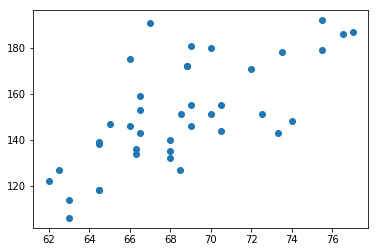

In [62]:
plt.scatter(data['Height'], data['Weight']);

### Exercise 2

Let's compare the difference in the definition of **correlation** from the signal processing point of view and from the point of view of statistics.

1. Compute the correlation from `scipy.signal` package of demeaned signals. Divide by the number of observations - 1.
2. Compute the covariance using `numpy` or any other package. Compare results

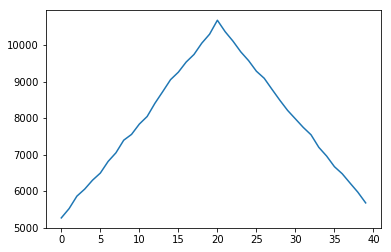

In [77]:
# compute demeaned correlation divided by n-1 using scipy.signal
import scipy.signal
x = data['Weight']
y = data['Height']
corr = scipy.signal.correlate(x, y, 'same') / (len(x) - 1)
n = np.arange(len(x))
plt.plot(n, corr);

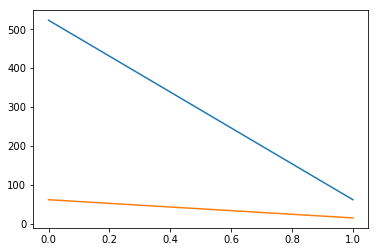

In [82]:
# compute covariance using numpy
cov = np.cov(x, y)
plt.plot(cov);

### Exercise 3

1. Implement the computation of Pearson correlation coefficient. 
1. Implement calculation of **t-statistics**, and **p-value** for the correlation coefficient. Add p-value to return value of the function.
1. Compare results with `scipy` implementation for `Height` and `Weight`.

In [89]:
import scipy.stats


def pearsonr(x, y):
    x_mean = np.average(x)
    y_mean = np.average(y)
    corr = np.sum((x-x_mean)*(y-y_mean)) / np.sqrt(np.sum((x-x_mean)**2) * np.sum((y-y_mean)**2))
    t = (x_mean - y_mean) / (np.std(x)**2 / x.shape[0] + np.std(y)**2/ y.shape[0])
    p = scipy.stats.t.sf(np.abs(t), x.shape[0] + y.shape[0] - 2) * 2
    return corr, p

print (pearsonr(x, y))
print (scipy.stats.pearsonr(x, y))

(0.69019868434268938, 1.7267611240969757e-08)
(0.69019868434268938, 8.3248094149178698e-07)
